# Summary
**1. 뉴런 (Perceptron)**
*   가중치 (weight) [w]: 입력신호가 결과에 주는 영향력(중요도)을 조절하는 변수
*   편향 (bias) [b]: 퍼셉트론이 얼마나 쉽게 활성화 하느냐를 조정하는 변수
*   활성화함수 (activation function) [f(x)]: 입력 신호의 가중합을 확인해 출력 신호를 결정하는 함수

**2. 단층 퍼셉트론 (Single Layer Perceptron)**
* 데이터의 입력층과 출력층만 있는 구조

**3. 다층 퍼셉트론 (Multi Layer Perceptron)**
* 입력층과 출력층 사이에 여러개의 은닉층이 있는 인공 신경망 (Deep neural network)
* 입력층에서 전달되는 값이 은닉층의 모든 노드로 전달되며,은닉층의 모든 노드의 출력값 또한 출력층의 모든 노드로 전달됨



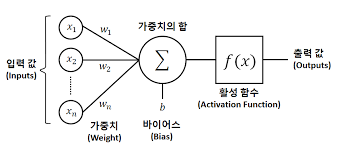

Tensorflow 설치

In [ ]:
# Install Tensorflow 2
!pip install -U Tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 438 kB 59.6 MB/s 
     |████████████████████████████████| 5.8 MB 49.2 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__ # tf 접미사: Tensorflow로 특화된 기능이 추가되어 keras API 구현했다는 의미
keras.__version__

'2.9.0'

#10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기
모든 label을 순차적으로 처리하는 것 대신 다양한 신경망 구축을 위해 함수형 API 활용

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 회귀용 MLP와의 차이
1) 출력층이 활성화 함수가 없는 하나의 뉴런을 가짐
2) 손실 함수로 "평균 제곱 오차"를 사용

In [ ]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
])

# compile() method 호출하여 사용할 손실 함수와 optimizer 지정
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8977 - val_loss: 1.9949
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9565 - val_loss: 0.6977
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5784 - val_loss: 0.4886
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4514 - val_loss: 0.4492
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4350 - val_loss: 0.4547
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4317 - val_loss: 0.4313
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4283 - val_loss: 0.4243
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4116 - val_loss: 0.4240
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4113 - val_loss: 0.4269
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4009 - val_loss: 0.4086

# 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

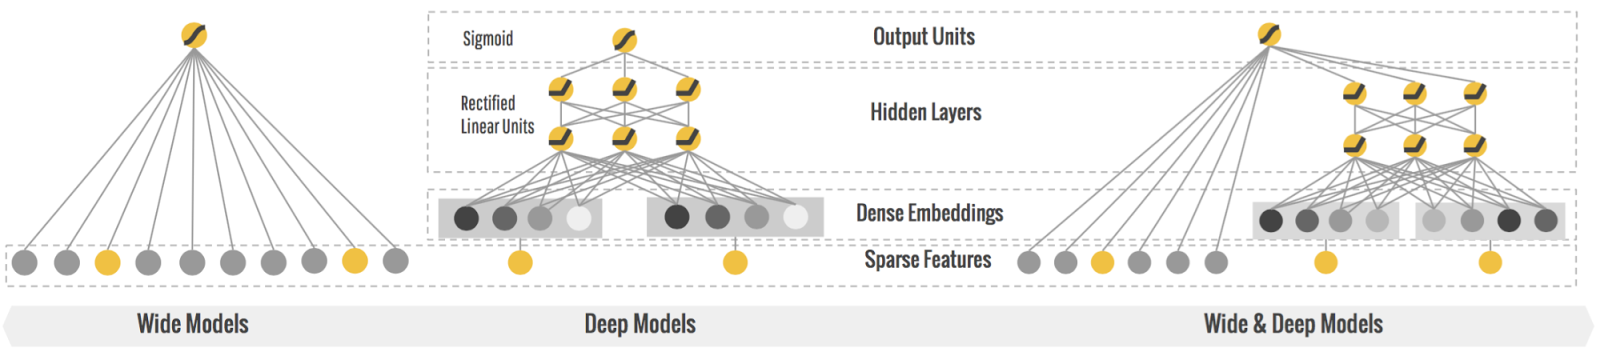

Wide and Deep Model 예시1> 
*   깊게 쌓은 층을 사용한 복잡한 패턴과 짧은 경로를 사용한 간단한 규칙 모두 학습 가능한 모델



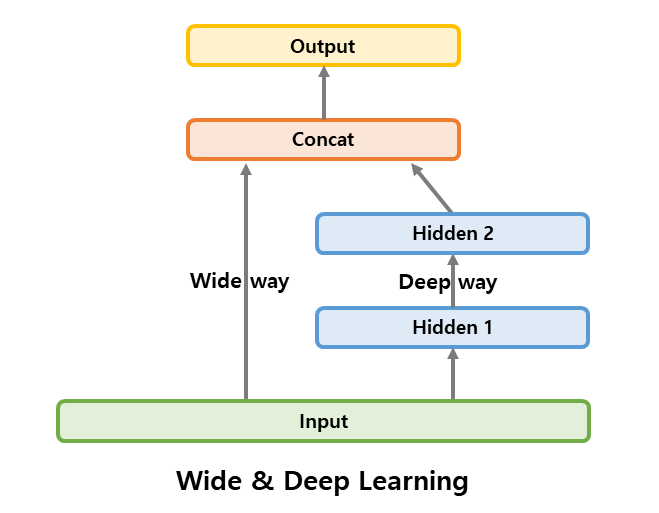

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # input 객체 생성
hidden1 = keras.layers.Dense(30, activation = "relu")(input_) # 30개 뉴런, ReLU 활성화 함수를 가지는 Dense 층
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1) # 위와 동일한 Dense 층
concat = keras.layers.Concatenate()([input_, hidden2]) # 모델 앙상블 (concatenate) -> 모델을 합침 (두번쩨 hidden layer의 입력과 출력 연결)
output = keras.layers.Dense(1)(concat) # 1개 뉴런, 활성화 함수 없는 출력층 생성
model = keras.Model(inputs=[input_], outputs=[output]) # Keras model 생성

Wide and Deep Model 예시 2> 다중 입력 사용
*   특성을 나누어 짧은 경로와 깊은 경로에 (중복을 허용하여) 특성을 나누어 보낼 수 있음



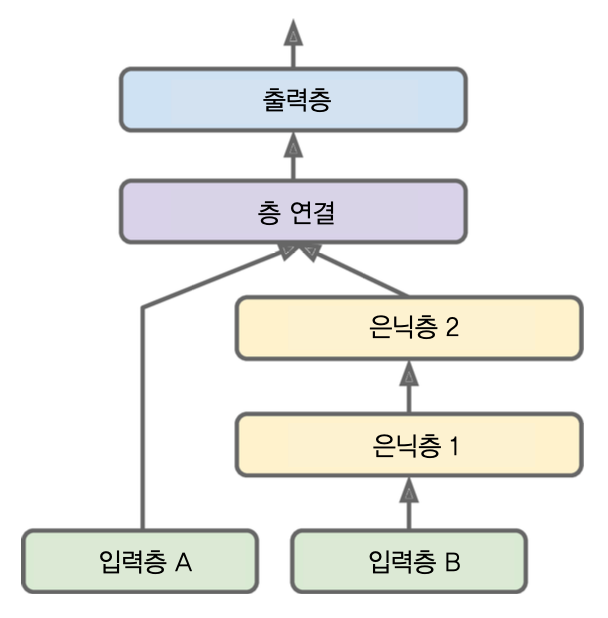

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input") # 5개의 특성 입력 받음
input_B = keras.layers.Input(shape=[6], name="deep_input") # 6개의 특성 입력 받음 
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output]) # input을 duple로 지정 -> (X_train_A, X_train_B) 전달 위해

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] # input A: 0-4번 인덱스 특성 / input B: 2-7번 인덱스 특성 / 중복: 2-4번 인덱스 특성
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=5,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 1.9983 - val_loss: 0.8676
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7348 - val_loss: 0.6978
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6542 - val_loss: 0.6556
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6227 - val_loss: 0.6322
Epoch 5/5
1/1 [==============================] - 0s 60ms/step


Wide and Deep Model 예시 3 > 다중 출력이 필요한 경우 사용

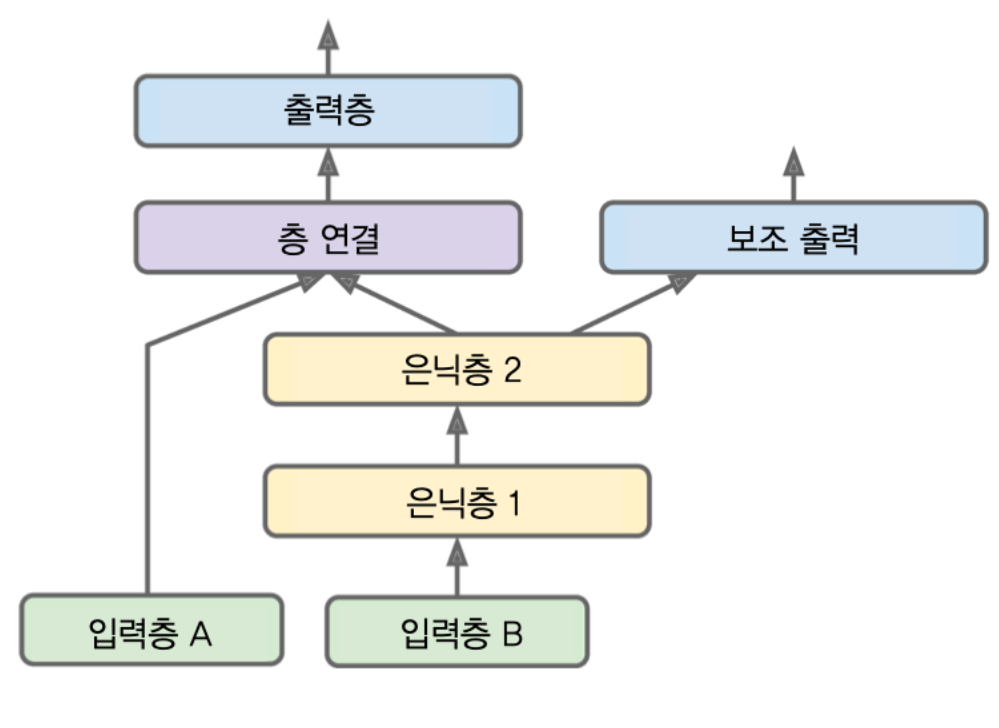

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input") # 5개의 특성 입력 받음
input_B = keras.layers.Input(shape=[6], name="deep_input") # 6개의 특성 입력 받음 
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # 보조출력 -> 모델의 출력 리스트에 추가!
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=5,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# 모델 평가
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

# 각 출력에 대한 예측 반환: predict()
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B]) 

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 0.9825 - main_output_loss: 0.8521 - aux_output_loss: 2.1559 - val_loss: 0.6182 - val_main_output_loss: 0.5613 - val_aux_output_loss: 1.1296
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5939 - main_output_loss: 0.5463 - aux_output_loss: 1.0218 - val_loss: 0.5499 - val_main_output_loss: 0.5118 - val_aux_output_loss: 0.8926
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5181 - main_output_loss: 0.4839 - aux_output_loss: 0.8264 - val_loss: 0.5075 - val_main_output_loss: 0.4780 - val_aux_output_loss: 0.7730
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - main_output_loss: 0.4596 - aux_output_loss: 0.7382 - val_loss: 0.4854 - val_main_output_loss: 0.4609 - val_aux_output_loss: 0.7057
Epoch 5/5
1/1 [==============================] - 0s 67ms/step


# 10.2.5 서브클래싱 API로 동적 모델 만들기

In [ ]:
class WideAndDeepModel (keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)  # 표준 매개변수 처리
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

Subclassing API
*   장점:명령형(Imperative) 프로그래밍 -> 조건문을 가지는 등 동적 구조 필요시 사용 가능
*   단점: 유연성이 높아지기 때문에 모델 저장 및 복사가 어렵고, 층 간 연결 정보 알 수 없음

-> 높은 유연성이 필요하지 않는다면 시퀀셜 API와 함수형 API 사용하는 것이 좋음!



# 10.2.6 모델 저장과 복원

In [ ]:
model = keras.Sequential([])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=5,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
model.save("my_keras_model.h5")

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 12.8523 - output_1_loss: 6.1986 - output_2_loss: 6.6537 - val_loss: 13.2036 - val_output_1_loss: 6.4049 - val_output_2_loss: 6.7987
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 12.8523 - output_1_loss: 6.1986 - output_2_loss: 6.6537 - val_loss: 13.2036 - val_output_1_loss: 6.4049 - val_output_2_loss: 6.7987
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 12.8523 - output_1_loss: 6.1986 - output_2_loss: 6.6537 - val_loss: 13.2036 - val_output_1_loss: 6.4049 - val_output_2_loss: 6.7987
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 12.8523 - output_1_loss: 6.1986 - output_2_loss: 6.6537 - val_loss: 13.2036 - val_output_1_loss: 6.4049 - val_output_2_loss: 6.7987
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 12.8523 - output_1_loss: 6.1986 - output_2_loss: 6.6537 - val_loss: 13.2036 - val_output_1_loss: 6.4049 - v

# 10.2.7 콜백 (callback) 사용하기
**1.** fit() method에서 **check point** 만들기 

-> 컴퓨터가 문제를 일으키는 경우 대비

In [ ]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)])

# compile() method 호출하여 사용할 손실 함수와 optimizer 지정
model.compile(loss="mean_squared_error", optimizer="sgd")

Epoch 1/5
363/363 [==============================] - 2s 5ms/step - loss: 0.7992
Epoch 2/5
363/363 [==============================] - 2s 4ms/step - loss: 0.6892
Epoch 3/5
363/363 [==============================] - 2s 4ms/step - loss: 1.1853
Epoch 4/5
363/363 [==============================] - 2s 4ms/step - loss: 0.6056
Epoch 5/5
363/363 [==============================] - 2s 4ms/step - loss: 0.7792


In [ ]:
# check point 추가 (검증세트 없는 경우)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

history = model.fit(X_train, y_train, epochs=5, callbacks=[checkpoint_cb])

In [ ]:
# check point 추가 (검증세트 있는 경우) 
# "save_best_only=True" 지정 가능 -> 최상의 검증 세트 점수에서만 모델 저장

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3729 - val_loss: 0.3807
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 0.3736
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3633 - val_loss: 0.3865
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3631 - val_loss: 0.3713
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3628 - val_loss: 0.3620


In [ ]:
# 최상의 모델로 복원
model = keras.models.load_model("my_keras_model.h5") 

**2. EarlyStopping** 콜백 사용
*   일정 epoch 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤

-> 시간과 컴퓨팅 자원 낭비 방지



In [ ]:
early_Stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_Stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3273 - val_loss: 0.3275
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3273 - val_loss: 0.3282
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3264 - val_loss: 0.3322
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3262 - val_loss: 0.3235
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3234 - val_loss: 0.3265
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3223 - val_loss: 0.3251
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3212 - val_loss: 0.3225
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3202 - val_loss: 0.3234
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3205 - val_loss: 0.3342
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3189 - val_lo

**3. 사용자 정의 call back**

--> 더 많은 제어를 원할 경우

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# 10.2.8 텐서보드를 사용해 시각화하기
텐서보드: Interactive 시각화 도구

*   프로그램을 수정하여 event file이라는 이진 로그파일에 데이터 출력해야함
*   각각의 이진 데이터 레코드 -> summary
*   서버 -> root directory / 프로그램 -> subdirectory (하나의 서버가 여러 프로그램 결과를 시각화 가능)



1. root log directory 정의

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
# 모델 구성과 컴파일
model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)])

# compile() method 호출하여 사용할 손실 함수와 optimizer 지정
model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
# Tensorboard
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 6ms/step - loss: 2.5244 - val_loss: 0.5988
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4620 - val_loss: 0.4710
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4189 - val_loss: 0.4452
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4021 - val_loss: 0.4431
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3910 - val_loss: 0.4353
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3848 - val_loss: 0.4283
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3792 - val_loss: 0.4353
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3741 - val_loss: 0.4153
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3713 - val_loss: 0.4130
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3698 - val_loss: 0.4129

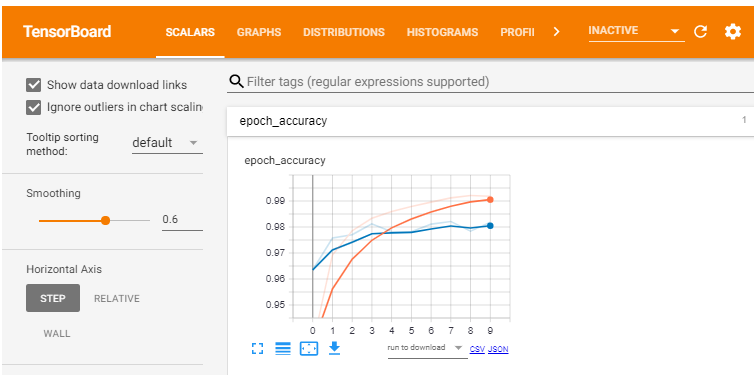

The END